<a href="https://colab.research.google.com/github/hoschidude/sqlvisx/blob/main/florian1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install accelerate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
!pip install flash_attn einops timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.6 MB/s eta 0:00:00
  Created wheel for flash_attn: filename=flash_attn-2.6.1-cp310-cp310-linux_x86_64.whl size=198447665 sha256=808523ff263d2fc1d3801147ad90d89dbfca67623a110c26592aef2064ea7b65
  Stored in directory: /root/.cache/pip/wheels/91/6a/38/f0faa036b4ac73a73247386f1ab1bb4cb4f6e72e6861a779f1
Successfully built flash_attn


In [4]:
import os
import sys
import textwrap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
from transformers import AutoProcessor, AutoModelForCausalLM

## which one
##
my_image = sys.argv[1]

## GPU only
##
device = 'cuda'
model_id = 'microsoft/Florence-2-base'

## load Florence-2 model
##
model = AutoModelForCausalLM.from_pretrained(model_id, device_map = device, trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, device_map = device, trust_remote_code=True)

pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

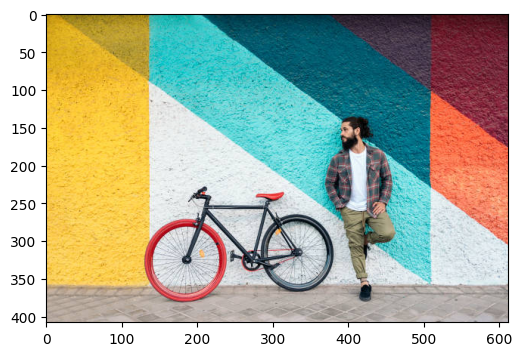

In [24]:
img1 = Image.open('bikeman.jpg')
rows, cols = 1, 1

plt.figure(figsize=(12, 4))

plt.subplot(rows, cols, 1)
plt.imshow(img1)
plt.show()

In [14]:
def generate_labels(task_prompt, image, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input

    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)

    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )

    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    output = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return output

A man leaning against a colorful wall next to a bike.


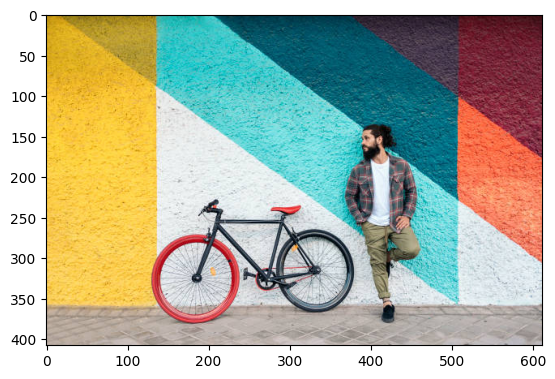

In [25]:
task_prompt = '<CAPTION>'
caption1 = list(generate_labels(task_prompt, img1).values())[0]
print(caption1)
plt.imshow(img1);


The image shows a young man standing in front of a colorful wall with
a bicycle leaning against it. The man is wearing a red plaid shirt,
khaki pants, and black shoes. He has a beard and is looking off to the
side with a serious expression on his face. The wall behind him is
painted in a variety of colors, including yellow, green, blue, red,
and orange. The bicycle is black with red rims and a red seat. The
overall mood of the image is casual and relaxed.


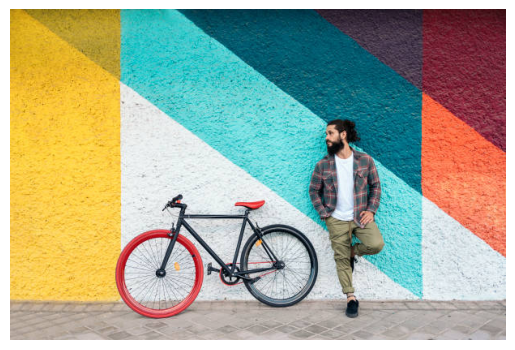

In [26]:
task_prompt2 = '<MORE_DETAILED_CAPTION>'
long_caption1 = list(generate_labels(task_prompt2, img1).values())[0]
print('\n'.join(textwrap.wrap(long_caption1)))
plt.imshow(img1);
plt.axis('off');

In [29]:

task_prompt3 = '<OD>'
results1 = generate_labels(task_prompt3, img1)

In [30]:

results1['<OD>']

{'bboxes': [[126.98999786376953,
   228.68399047851562,
   389.5379943847656,
   381.2760009765625],
  [129.43800354003906,
   271.9320068359375,
   242.65798950195312,
   382.09197998046875],
  [281.2139892578125,
   265.40399169921875,
   382.1940002441406,
   368.62799072265625],
  [412.79400634765625,
   356.38800048828125,
   433.60198974609375,
   381.2760009765625],
  [363.22198486328125,
   135.2519989013672,
   469.0979919433594,
   376.7879943847656]],
 'labels': ['bicycle', 'bicycle wheel', 'bicycle wheel', 'footwear', 'man']}

In [16]:
def plot_bbox(image, data):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

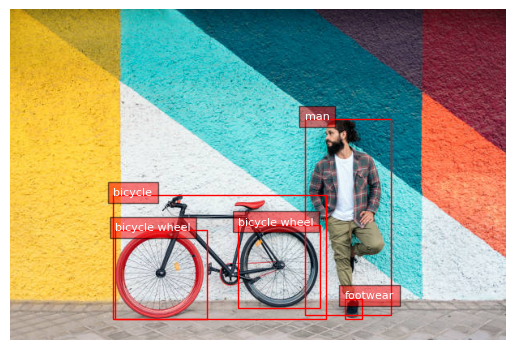

In [31]:
plot_bbox(img1, results1['<OD>']);

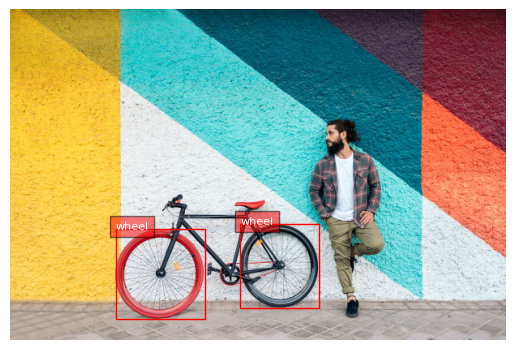

In [35]:
task_prompt4 = '<CAPTION_TO_PHRASE_GROUNDING>'
results1 = generate_labels(task_prompt4, img1, text_input="wheel")

plot_bbox(img1, results1['<CAPTION_TO_PHRASE_GROUNDING>']);

# <MORE_DETAILED_CAPTION>
# <CAPTION> , <OD>, <REGION_TO_SEGMENTATION>,
# <REFERRING_EXPRESSION_SEGMENTATION>, <OCR>,
# <OCR_WITH_REGION>
#

<CAPTION_TO_PHRASE_GROUNDING>
<OD>


<OD>
<DENSE_REGION_CAPTION>
<REGION_PROPOSAL>
<REFERRING_EXPRESSION_SEGMENTATION>
<REGION_TO_SEGMENTATION>